In [1]:
from __future__ import print_function, division

In [2]:
# Supress warnings
import warnings

warnings.simplefilter("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

%matplotlib inline

### EDA Books

* [Exploratory Data Analysis](http://www.amazon.com/Exploratory-Data-Analysis-John-Tukey/dp/0201076160) by John Tukey

Other Authors on EDA:

* William Cleveland
* Edward Tufte

In [4]:
# Let's do a histogram with defaults

(array([  1.,   3.,   3.,  10.,  15.,  23.,  23.,   9.,   8.,   5.]),
 array([-2.76219666, -2.29696059, -1.83172452, -1.36648844, -0.90125237,
        -0.4360163 ,  0.02921977,  0.49445585,  0.95969192,  1.42492799,
         1.89016406]),
 <a list of 10 Patch objects>)

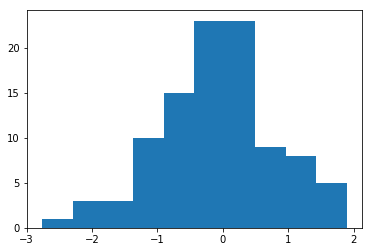

In [5]:
plt.hist(np.random.randn(100))

### Better Defaults

In [6]:
import seaborn as sns

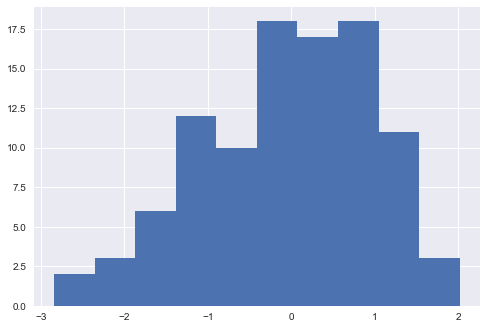

In [7]:
plt.hist(np.random.randn(100));

* What do you see different between the two plots?

## Seaborn

Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. 

Source: [Seaborn Docs](http://stanford.edu/~mwaskom/software/seaborn/)

Seaborn comes with some sample datasets that we will use to explore (https://github.com/mwaskom/seaborn-data)

In [8]:
titanic = sns.load_dataset("titanic")

In [9]:
# This is our familiar Pandas dataframe
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [10]:
# Remove all rows that have null Age
titanic = titanic[titanic.age.notnull()]
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 15 columns):
survived       714 non-null int64
pclass         714 non-null int64
sex            714 non-null object
age            714 non-null float64
sibsp          714 non-null int64
parch          714 non-null int64
fare           714 non-null float64
embarked       712 non-null object
class          714 non-null category
who            714 non-null object
adult_male     714 non-null bool
deck           184 non-null category
embark_town    712 non-null object
alive          714 non-null object
alone          714 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 70.2+ KB


### Histogram (Distributions)

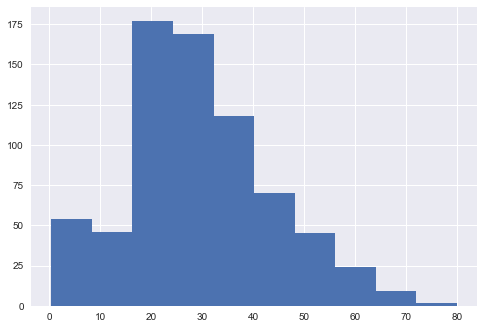

In [11]:
# We can plot distribution of Age by just using Pandas
# We don't need Seaborn for that
# Plot an histogram of age

titanic.age.hist()

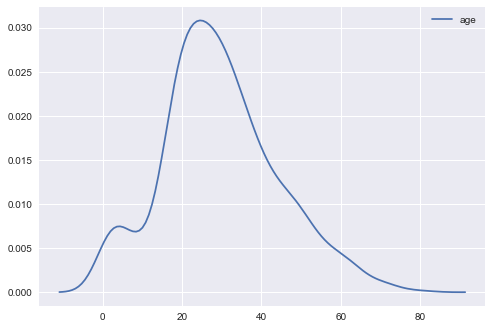

In [12]:
# But Seaborn adds some additional ways to look at distributions
# ex: Kernel Density estimation.. 
sns.kdeplot(titanic.age)

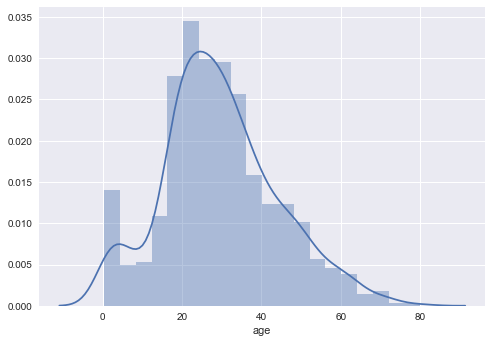

In [13]:
# Overlay Histogram and Dist Plot
sns.distplot(titanic.age)

### Box Plots

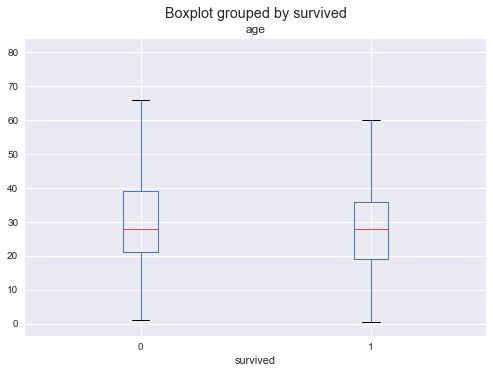

In [14]:
# Box plot "age" by "sex", using pandas object

titanic.boxplot('age',by='survived');

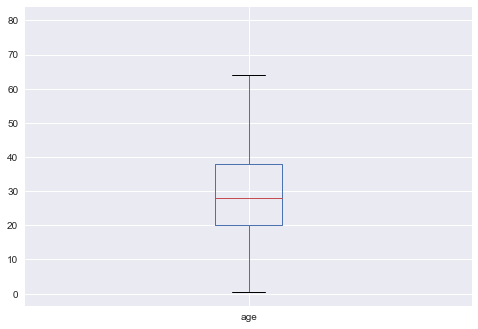

In [15]:
#sns.reset_orig()
titanic.boxplot('age');

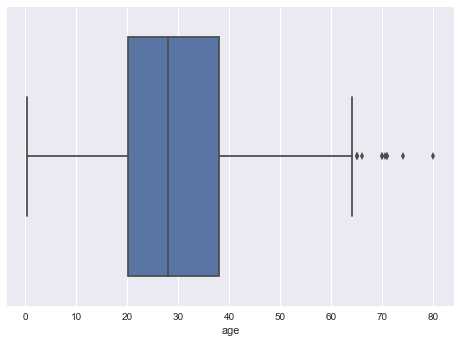

In [16]:
import seaborn as sns
sns.boxplot(titanic.age,whis=1.5)

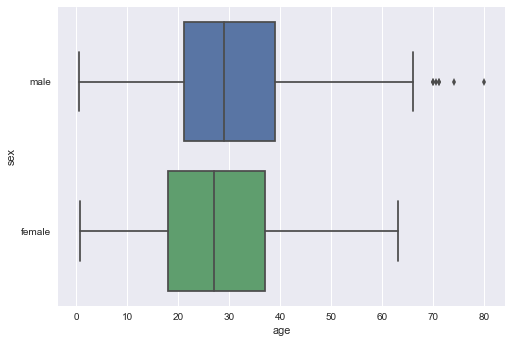

In [17]:
# seaborn recognizes that one of our variables is categorical, 
# and will perform a groupby
sns.boxplot(titanic.age, titanic.sex)

### Violin Plot

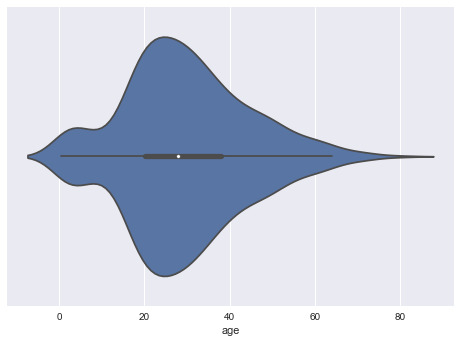

In [18]:
sns.violinplot(titanic.age)

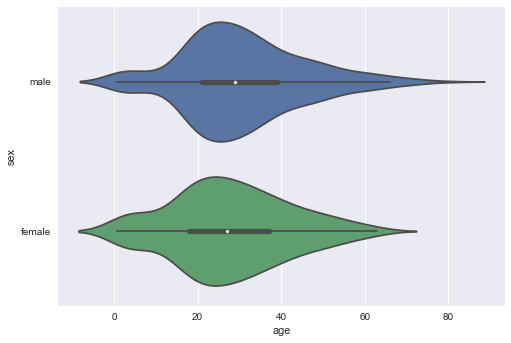

In [19]:
# seaborn is going to make some assumptions for us, 
# seeing as .. boxplot/kde is a univariate viz. tool

sns.violinplot(titanic.age, titanic.sex)

### Plot by Group

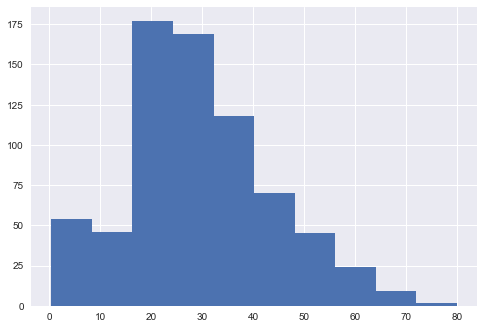

In [20]:
# Pandas Histogram of "age"

titanic.age.hist();

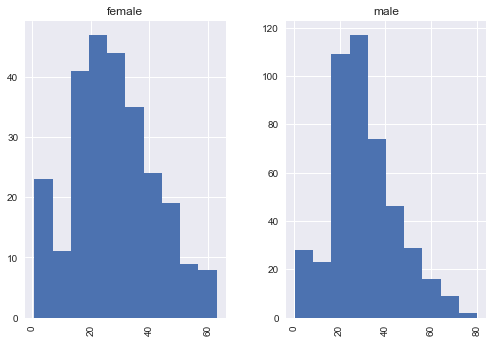

In [21]:
# Pandas histogram of "age" by "sex"

titanic.hist('age',by='sex');

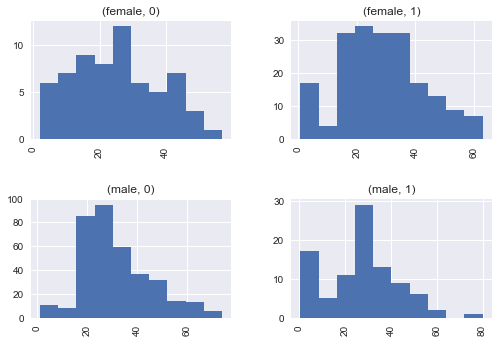

In [22]:
# Pandas histogram of "age" by "sex" and "survived"

titanic.hist('age',by=['sex','survived']);

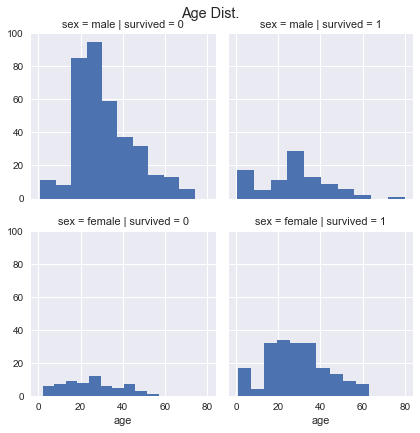

In [23]:
# Let's now look at Distribution of Age and Survived
# Now look at survived data
g = sns.FacetGrid(titanic, row='sex', col='survived', sharex=True, sharey=True)
g.map(plt.hist, "age")

plt.suptitle("Age Dist.",y=1.0);

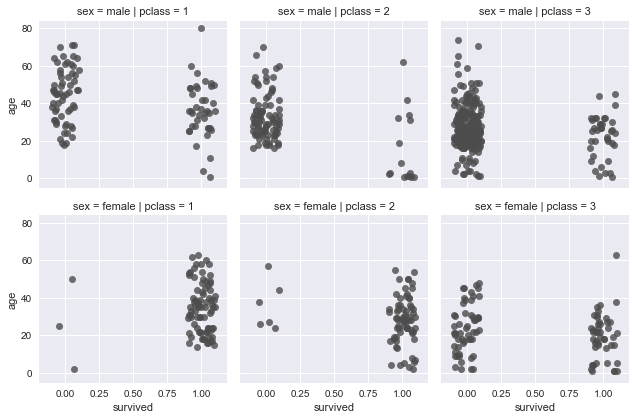

In [24]:
# Plot how many survived, by gender and class
grid_plot = sns.FacetGrid(titanic, row='sex', col='pclass')
grid_plot.map(sns.regplot, 'survived', 'age',color='.3', fit_reg=False, x_jitter=.1);

### Let's look at a IRIS Dataset

In [25]:
iris = sns.load_dataset("iris")

In [26]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Scatter Matrix

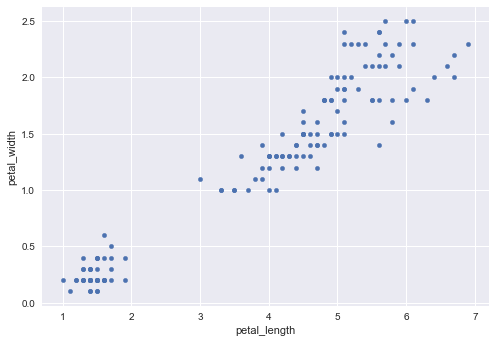

In [27]:
# Scatter Plot with Pandas on two columns - "petal_length", "petal_width"

iris.plot(x='petal_length',y='petal_width',kind='scatter')

In [28]:
# Look at pair wise comparison (scatter matrix) between all numerical variables

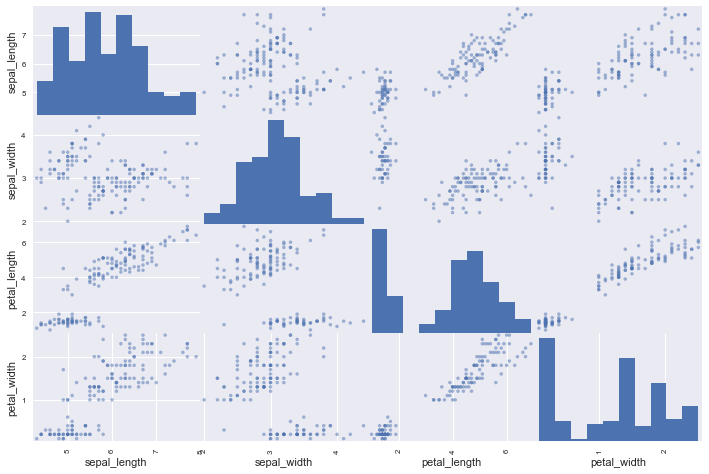

In [29]:
# Blow it up a little bit
pd.scatter_matrix(iris, figsize=(12,8));

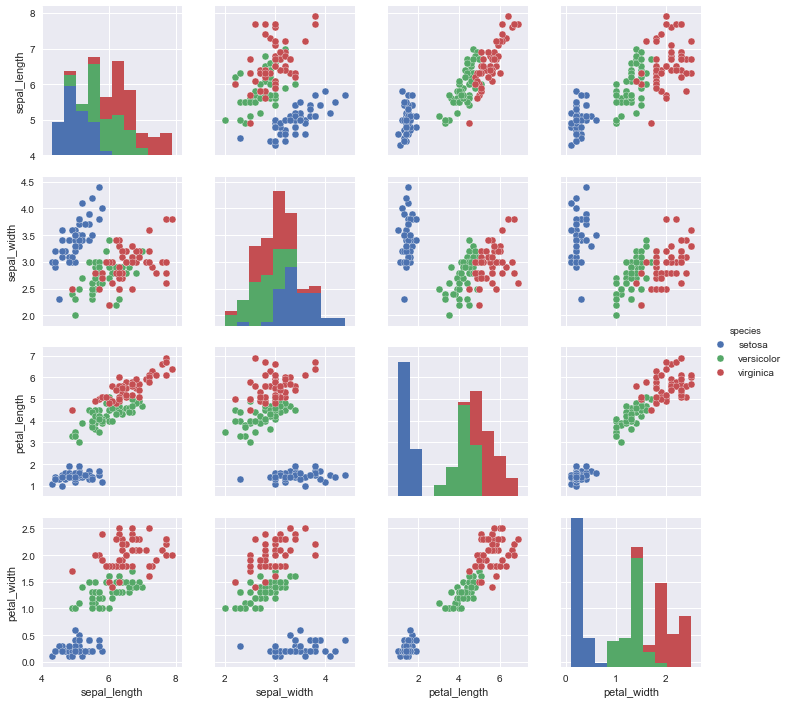

In [30]:
# Seaborn does this pair wise comparison Better
sns.pairplot(iris, hue="species")

### Joint Plot

* Multiple plots at once

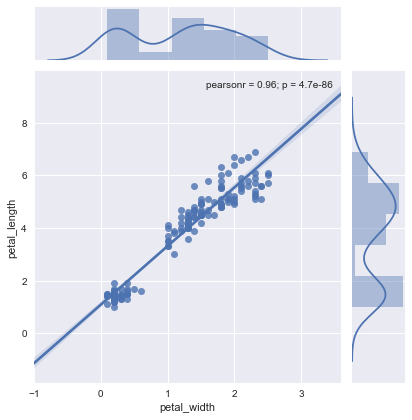

In [31]:
# name all the plots!
sns.jointplot("petal_width", "petal_length", kind="regplot", data=iris)